## K-means


Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 1946.53it/s]
/home/proffiterol/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Etichette dei cluster: [1 1 0 0 0 1 2 1 2]


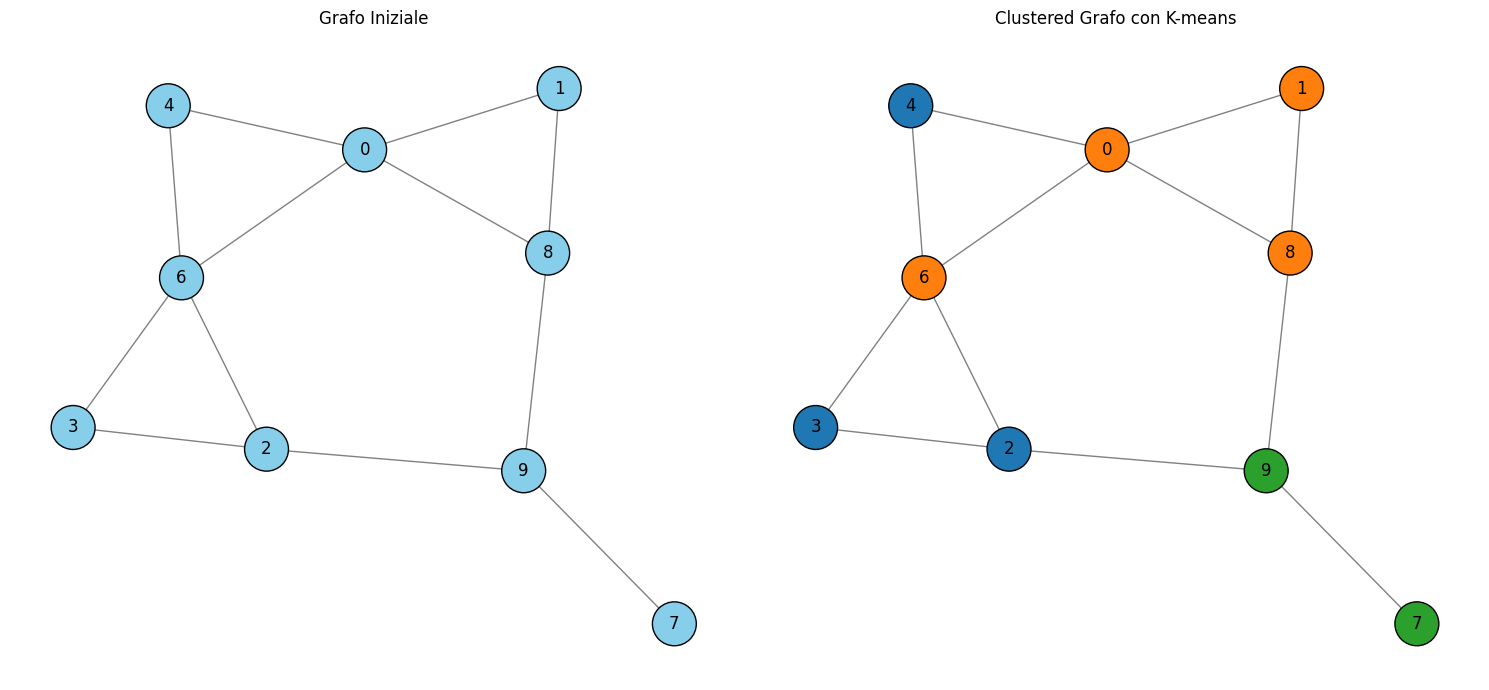

In [6]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Definizione del grafo
class Graph:
    def __init__(self):
        self.grafo = {}

    def aggiungi_vertice(self, vertice):
        if vertice not in self.grafo:
            self.grafo[vertice] = []

    def aggiungi_arco(self, u, v):
        if u in self.grafo and v in self.grafo:
            self.grafo[u].append(v)
            self.grafo[v].append(u)

def converti_grafo_personalizzato_in_networkx(grafo_personalizzato):
    G = nx.Graph()
    for vertice, adiacenti in grafo_personalizzato.grafo.items():
        G.add_node(vertice)
        for adiacente in adiacenti:
            G.add_edge(vertice, adiacente)
    return G

def plot_graph(graph, ax, title, colors=None):
    pos = nx.spring_layout(graph, seed=42)
    labels = {node: str(node) for node in graph.nodes()}

    node_colors = {node: 'skyblue' for node in graph.nodes()}
    if colors:
        color_cycle = itertools.cycle(plt.cm.tab10.colors)
        for i, cluster in enumerate(colors):
            color = next(color_cycle)
            for node in cluster:
                node_colors[int(node)] = color

    nx.set_node_attributes(graph, node_colors, 'color')

    nx.draw(graph, pos, with_labels=True, labels=labels, node_size=1000, 
            node_color=list(node_colors.values()), ax=ax,
            font_size=12, font_color='black', edge_color='gray', 
            edgecolors='black', linewidths=1)

    ax.set_title(title)

# Creazione del grafo
grafo = Graph()
grafo.aggiungi_vertice(0)
grafo.aggiungi_vertice(1)
grafo.aggiungi_vertice(2)
grafo.aggiungi_vertice(3)
grafo.aggiungi_vertice(4)
grafo.aggiungi_vertice(6)
grafo.aggiungi_vertice(7)
grafo.aggiungi_vertice(8)
grafo.aggiungi_vertice(9)
grafo.aggiungi_arco(0, 8)
grafo.aggiungi_arco(0, 4)
grafo.aggiungi_arco(0, 6)
grafo.aggiungi_arco(1, 0)
grafo.aggiungi_arco(1, 8)
grafo.aggiungi_arco(6, 3)
grafo.aggiungi_arco(6, 4)
grafo.aggiungi_arco(6, 2)
grafo.aggiungi_arco(2, 9)
grafo.aggiungi_arco(3, 2)
grafo.aggiungi_arco(8, 9)
grafo.aggiungi_arco(9, 7)

# Conversione del grafo
G = converti_grafo_personalizzato_in_networkx(grafo)

# Creazione del modello Node2Vec
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=50)

# Training del modello Node2Vec
model = node2vec.fit(window=7, min_count=1)

# Preparazione dei dati per k-means
nodes = sorted(G.nodes(), key=int)  # Sort nodes
data = np.array([model.wv[str(i)] for i in nodes])

# Applicazione dell'algoritmo k-means
kmeans = KMeans(n_clusters=3, random_state=42).fit(data)

# Ottenimento delle etichette dei cluster e stampa dei risultati
labels = kmeans.labels_
print("Etichette dei cluster:", labels)

# Creazione di una lista di clusters dal tuo modello k-means
clusters = [[] for _ in range(kmeans.n_clusters)]
for node, cluster_id in enumerate(labels):
    clusters[cluster_id].append(str(nodes[node]))  # Use sorted nodes

# Visualizzazione del grafo
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plot_graph(G, axs[0], "Grafo Iniziale")
plot_graph(G, axs[1], "Clustered Grafo con K-means", colors=clusters)

plt.tight_layout()
plt.show()
